In [1]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.4/40.4 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 749.1/749.1 kB 20.0 MB/s eta 0:00:0000:01


In [2]:
import numpy as np
import os
import cv2
import tensorflow as tf
from tqdm import tqdm
import pandas as pd
import yaml
from ultralytics import YOLO
import matplotlib.pyplot as plt

2024-04-02 15:43:14.722925: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-02 15:43:14.723039: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-02 15:43:14.868206: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [3]:
model = YOLO('yolov8n-seg.pt') 

100%|██████████| 6.73M/6.73M [00:00<00:00, 85.8MB/s]


In [4]:
images = []
imgs_path = '/kaggle/input/pothole-image-segmentation-dataset/Pothole_Segmentation_YOLOv8/train/images'

for i in tqdm(os.listdir(imgs_path)):
    img_path = os.path.join(imgs_path,i)
    img = cv2.imread(img_path,cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (256,256))
    images.append(img)
    

100%|██████████| 720/720 [00:10<00:00, 69.52it/s]


In [5]:
imgs = np.array(images)

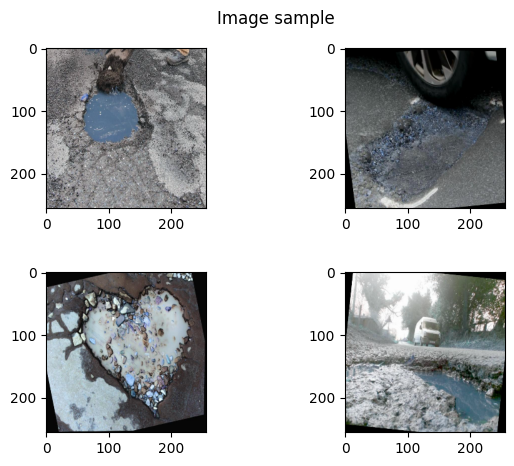

In [6]:
import random

figure,axs = plt.subplots(2,2)

figure.suptitle('Image sample')

axs[0,0].imshow(imgs[random.randrange(0,len(imgs)-1)])
axs[0,1].imshow(imgs[random.randrange(0,len(imgs)-1)])
axs[1,0].imshow(imgs[random.randrange(0,len(imgs)-1)])
axs[1,1].imshow(imgs[random.randrange(0,len(imgs)-1)])
figure.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)

figure.show()

In [7]:
dataset_path = '/kaggle/input/pothole-image-segmentation-dataset/Pothole_Segmentation_YOLOv8'

# Set the path to the YAML file
yaml_file_path = os.path.join(dataset_path, 'data.yaml')

# Load and print the contents of the YAML file
with open(yaml_file_path, 'r') as file:
    yaml_content = yaml.load(file, Loader=yaml.FullLoader)
    print(yaml.dump(yaml_content, default_flow_style=False))

names:
- Pothole
nc: 1
roboflow:
  license: CC BY 4.0
  project: pothole_segmentation_yolov8
  url: https://universe.roboflow.com/farzad/pothole_segmentation_yolov8/dataset/1
  version: 1
  workspace: farzad
train: ../train/images
val: ../valid/images



In [11]:
import wandb
wandb.disabled = True

In [18]:
results = model.train(
    data=yaml_file_path,     
    epochs=150,              
    imgsz=640,               
    patience=15,             
    batch=16,                
    optimizer='auto',        
    lr0=0.0001,               
    lrf=0.01,                
    dropout=0.25,            
    device=0,                
    seed=42
)

Ultralytics YOLOv8.1.42 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)
engine/trainer: task=segment, mode=train, model=yolov8n-seg.pt, data=/kaggle/input/pothole-image-segmentation-dataset/Pothole_Segmentation_YOLOv8/data.yaml, epochs=150, time=None, patience=15, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=train4, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=42, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.25, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, sa

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

  ········································


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks with YOLOv8n...


100%|██████████| 6.23M/6.23M [00:00<00:00, 109MB/s]


AMP: checks passed ✅


train: Scanning /kaggle/input/pothole-image-segmentation-dataset/Pothole_Segmentation_YOLOv8/train/labels... 720 images, 0 backgrounds, 0 corrupt: 100%|██████████| 720/720 [00:02<00:00, 287.10it/s]

train: WARNING ⚠️ Cache directory /kaggle/input/pothole-image-segmentation-dataset/Pothole_Segmentation_YOLOv8/train is not writeable, cache not saved.


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /kaggle/input/pothole-image-segmentation-dataset/Pothole_Segmentation_YOLOv8/valid/labels... 60 images, 0 backgrounds, 0 corrupt: 100%|██████████| 60/60 [00:00<00:00, 187.79it/s]

val: WARNING ⚠️ Cache directory /kaggle/input/pothole-image-segmentation-dataset/Pothole_Segmentation_YOLOv8/valid is not writeable, cache not saved.


Plotting labels to runs/segment/train4/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.0001' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 66 weight(decay=0.0), 77 weight(decay=0.0005), 76 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to runs/segment/train4
Starting training for 150 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      1/150       3.2G      1.491      2.951      2.336      1.447         49        640: 100%|██████████| 45/45 [00:20<00:00,  2.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.36it/s]

                   all         60        201      0.502     0.0945      0.161     0.0804      0.695     0.0682      0.162     0.0826



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      2/150      3.09G      1.453      2.443      1.812      1.411         56        640: 100%|██████████| 45/45 [00:15<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.99it/s]

                   all         60        201      0.216      0.279      0.184     0.0772      0.208      0.274      0.178      0.077



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      3/150      3.23G      1.498      2.477      1.739      1.454         68        640: 100%|██████████| 45/45 [00:15<00:00,  2.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.08it/s]

                   all         60        201      0.219      0.269      0.174     0.0683      0.189      0.234      0.128     0.0453



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      4/150      3.16G      1.518      2.446      1.684      1.491         68        640: 100%|██████████| 45/45 [00:15<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.98it/s]

                   all         60        201      0.471      0.563      0.482      0.219      0.453      0.502      0.419       0.19



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      5/150      3.18G       1.49      2.401       1.61      1.441         46        640: 100%|██████████| 45/45 [00:14<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.82it/s]

                   all         60        201       0.52      0.506      0.476      0.208      0.519      0.517      0.481      0.222



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      6/150      3.29G      1.477      2.373      1.487      1.436         83        640: 100%|██████████| 45/45 [00:15<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.13it/s]

                   all         60        201      0.583      0.463      0.498      0.265      0.577      0.458      0.481      0.245



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      7/150      3.27G      1.443      2.371      1.481       1.42         59        640: 100%|██████████| 45/45 [00:14<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.26it/s]

                   all         60        201      0.611      0.473      0.488      0.245      0.629      0.481      0.498       0.25



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      8/150      3.59G      1.471      2.312      1.446      1.399         80        640: 100%|██████████| 45/45 [00:15<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.27it/s]

                   all         60        201      0.571      0.468      0.478      0.244      0.588      0.473      0.486      0.248



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      9/150      3.16G      1.405      2.263      1.387      1.386         66        640: 100%|██████████| 45/45 [00:14<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.14it/s]

                   all         60        201      0.466      0.557      0.449      0.245      0.535      0.498      0.478      0.225



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     10/150      3.27G      1.408      2.216      1.347      1.386         80        640: 100%|██████████| 45/45 [00:14<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.27it/s]

                   all         60        201      0.631      0.527      0.579      0.328      0.653      0.543      0.598      0.314



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     11/150      3.15G      1.344      2.182      1.303      1.354         60        640: 100%|██████████| 45/45 [00:14<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.20it/s]

                   all         60        201      0.533      0.493      0.524      0.266      0.553       0.51      0.531      0.262



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     12/150      3.19G      1.355      2.176      1.283      1.342         75        640: 100%|██████████| 45/45 [00:14<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.42it/s]

                   all         60        201      0.676      0.527      0.587      0.302      0.685      0.532      0.598      0.299



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     13/150      3.12G      1.323      2.131      1.246      1.331         71        640: 100%|██████████| 45/45 [00:14<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.19it/s]

                   all         60        201      0.594      0.507       0.51      0.263      0.582      0.498      0.483      0.246



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     14/150      3.29G      1.321       2.14      1.226      1.314         77        640: 100%|██████████| 45/45 [00:14<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.23it/s]

                   all         60        201      0.704      0.569      0.655      0.357      0.711      0.574      0.657      0.347



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     15/150      3.14G       1.32      2.106      1.225      1.324         74        640: 100%|██████████| 45/45 [00:14<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.29it/s]

                   all         60        201       0.64      0.592      0.586      0.316      0.678      0.606      0.607      0.311



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     16/150      3.18G       1.28      2.022      1.125       1.28         85        640: 100%|██████████| 45/45 [00:15<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.34it/s]

                   all         60        201      0.655      0.602      0.639      0.349      0.673      0.617      0.664      0.339



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     17/150      3.21G       1.25      2.016      1.099      1.278         73        640: 100%|██████████| 45/45 [00:14<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.29it/s]

                   all         60        201      0.673      0.697      0.699      0.375       0.68      0.701      0.695      0.367



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     18/150      3.16G      1.275      2.013      1.093      1.284         73        640: 100%|██████████| 45/45 [00:15<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.43it/s]

                   all         60        201      0.677      0.602      0.625      0.349      0.687      0.597       0.64      0.344



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     19/150      3.16G      1.275      2.037       1.09      1.281         44        640: 100%|██████████| 45/45 [00:14<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.34it/s]

                   all         60        201      0.643      0.609      0.643      0.378      0.638      0.605      0.644      0.355



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     20/150      3.23G      1.243      2.003      1.099      1.269         52        640: 100%|██████████| 45/45 [00:14<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.31it/s]

                   all         60        201      0.644      0.639      0.649      0.353      0.595        0.7       0.64      0.336



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     21/150      3.24G      1.206      1.939      1.032      1.252         81        640: 100%|██████████| 45/45 [00:15<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.08it/s]

                   all         60        201      0.626      0.597      0.631      0.356      0.647      0.627      0.658      0.341



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     22/150      3.12G      1.203      1.955      1.053      1.254         71        640: 100%|██████████| 45/45 [00:14<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.36it/s]

                   all         60        201      0.744      0.572      0.677      0.391       0.75      0.577      0.669       0.37



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     23/150      3.27G      1.208      1.928      1.023      1.243         64        640: 100%|██████████| 45/45 [00:14<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.16it/s]

                   all         60        201      0.714      0.609      0.659      0.383      0.714      0.609      0.659      0.371



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     24/150       3.3G      1.242      1.933       1.03      1.255         65        640: 100%|██████████| 45/45 [00:15<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.32it/s]

                   all         60        201      0.714      0.546       0.63      0.349      0.744      0.562       0.64       0.35



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     25/150       3.3G      1.193       1.89      1.002      1.227         86        640: 100%|██████████| 45/45 [00:14<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.87it/s]

                   all         60        201      0.703      0.554      0.643      0.376      0.728      0.573      0.661      0.363



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     26/150      3.23G      1.178      1.908      0.993      1.219         58        640: 100%|██████████| 45/45 [00:14<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.45it/s]

                   all         60        201      0.649      0.672      0.673      0.397      0.694      0.667      0.688      0.386



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     27/150      3.26G      1.184      1.885     0.9795      1.233         60        640: 100%|██████████| 45/45 [00:14<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.06it/s]

                   all         60        201      0.695      0.617       0.66      0.377      0.734      0.607      0.667      0.361



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     28/150      3.16G      1.159      1.827     0.9398      1.203         64        640: 100%|██████████| 45/45 [00:14<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.35it/s]

                   all         60        201      0.714      0.507      0.608      0.356        0.7      0.498      0.597      0.336



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     29/150      3.16G      1.155      1.866     0.9467      1.209         65        640: 100%|██████████| 45/45 [00:15<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.47it/s]

                   all         60        201      0.704      0.607      0.674      0.389       0.73      0.632      0.693      0.375



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     30/150      3.19G       1.19      1.889     0.9578       1.22         53        640: 100%|██████████| 45/45 [00:14<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.32it/s]

                   all         60        201      0.739      0.637      0.692      0.362      0.749      0.637      0.712      0.367



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     31/150      3.17G      1.178      1.884     0.9349      1.218         74        640: 100%|██████████| 45/45 [00:15<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.25it/s]

                   all         60        201      0.683      0.632      0.696      0.424      0.704      0.627      0.701       0.41



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     32/150      3.21G      1.159      1.857     0.9361      1.195         82        640: 100%|██████████| 45/45 [00:14<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.11it/s]

                   all         60        201       0.67      0.607       0.66      0.409      0.675      0.601      0.671       0.37



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     33/150      3.05G      1.107      1.776      0.866      1.175         72        640: 100%|██████████| 45/45 [00:14<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.43it/s]

                   all         60        201      0.692      0.597      0.676      0.404      0.716      0.617       0.69      0.383



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     34/150      3.18G      1.091      1.781     0.8744      1.178         84        640: 100%|██████████| 45/45 [00:14<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.19it/s]

                   all         60        201      0.679      0.579      0.671      0.394      0.649      0.653      0.689      0.385



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     35/150      3.28G      1.106      1.787     0.8735      1.185         74        640: 100%|██████████| 45/45 [00:14<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.26it/s]

                   all         60        201      0.693      0.652      0.677       0.38      0.706      0.632      0.671      0.364



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     36/150      3.26G        1.1      1.764     0.8588      1.159         68        640: 100%|██████████| 45/45 [00:14<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.42it/s]

                   all         60        201      0.602       0.67      0.652      0.392      0.607      0.675      0.668      0.373



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     37/150      3.18G      1.094      1.761     0.8454      1.173         86        640: 100%|██████████| 45/45 [00:15<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.19it/s]

                   all         60        201      0.585      0.632      0.626      0.374       0.63      0.612       0.65      0.365



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     38/150      3.32G      1.087      1.701     0.8241      1.155         72        640: 100%|██████████| 45/45 [00:14<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.96it/s]

                   all         60        201      0.667      0.679      0.696      0.399      0.663      0.675      0.689      0.384



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     39/150      3.21G        1.1      1.774     0.8527      1.164         97        640: 100%|██████████| 45/45 [00:15<00:00,  2.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.32it/s]

                   all         60        201      0.686      0.612      0.658      0.384      0.696      0.622      0.667      0.377



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     40/150      3.16G      1.089       1.75     0.8589      1.175        105        640: 100%|██████████| 45/45 [00:15<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.33it/s]

                   all         60        201      0.708      0.632       0.66      0.392      0.719      0.647      0.671      0.374



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     41/150      3.55G      1.073      1.716     0.8206      1.144         51        640: 100%|██████████| 45/45 [00:14<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.30it/s]

                   all         60        201      0.748      0.622      0.721      0.417      0.681      0.658      0.716      0.393



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     42/150      3.18G      1.055      1.743      0.828      1.153         70        640: 100%|██████████| 45/45 [00:14<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.36it/s]

                   all         60        201      0.621      0.637      0.632      0.368      0.666      0.612      0.636      0.358



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     43/150      3.21G       1.08      1.748     0.8476      1.163         46        640: 100%|██████████| 45/45 [00:15<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.26it/s]

                   all         60        201      0.644      0.632       0.66      0.398      0.667      0.637      0.678      0.395



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     44/150      3.29G      1.045      1.682     0.7947      1.146         75        640: 100%|██████████| 45/45 [00:14<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.43it/s]

                   all         60        201      0.671      0.647      0.682      0.406      0.692      0.662      0.694      0.395



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     45/150      3.21G      1.067      1.709     0.8056      1.152         59        640: 100%|██████████| 45/45 [00:14<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.46it/s]

                   all         60        201      0.705      0.597      0.654       0.41      0.714      0.607      0.671      0.392



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     46/150      3.62G      1.038      1.652     0.7897      1.146         56        640: 100%|██████████| 45/45 [00:14<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.25it/s]

                   all         60        201      0.701      0.548      0.648      0.398      0.723      0.587      0.661      0.388
EarlyStopping: Training stopped early as no improvement observed in last 15 epochs. Best results observed at epoch 31, best model saved as best.pt.
To update EarlyStopping(patience=15) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



46 epochs completed in 0.212 hours.
Optimizer stripped from runs/segment/train4/weights/last.pt, 6.8MB
Optimizer stripped from runs/segment/train4/weights/best.pt, 6.8MB

Validating runs/segment/train4/weights/best.pt...
Ultralytics YOLOv8.1.42 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)
YOLOv8n-seg summary (fused): 195 layers, 3258259 parameters, 0 gradients, 12.0 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.84it/s]


                   all         60        201      0.688      0.637      0.697      0.424      0.704      0.627      0.702       0.41
Speed: 0.2ms preprocess, 4.1ms inference, 0.0ms loss, 1.0ms postprocess per image
Results saved to runs/segment/train4


In [19]:
post_training_files_path = '/kaggle/working/runs/segment/train'

# List the files in the directory
!ls {post_training_files_path}

args.yaml  events.out.tfevents.1712072629.a77ff588e60a.34.0  weights


In [21]:
best_model_path = '/kaggle/working/runs/segment/train4/weights/best.pt'

# Load the best model weights into the YOLO model
best_model = YOLO(best_model_path)

# Validate the best model using the validation set with default parameters
metrics = best_model.val(split='val')

Ultralytics YOLOv8.1.42 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)
YOLOv8n-seg summary (fused): 195 layers, 3258259 parameters, 0 gradients, 12.0 GFLOPs


val: Scanning /kaggle/input/pothole-image-segmentation-dataset/Pothole_Segmentation_YOLOv8/valid/labels... 60 images, 0 backgrounds, 0 corrupt: 100%|██████████| 60/60 [00:00<00:00, 690.22it/s]

val: WARNING ⚠️ Cache directory /kaggle/input/pothole-image-segmentation-dataset/Pothole_Segmentation_YOLOv8/valid is not writeable, cache not saved.



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:04<00:00,  1.17s/it]


                   all         60        201      0.692      0.636      0.699      0.426      0.708      0.628      0.704      0.411
Speed: 0.2ms preprocess, 18.3ms inference, 0.0ms loss, 9.8ms postprocess per image
Results saved to runs/segment/val



image 1/1 /kaggle/input/pothole-image-segmentation-dataset/Pothole_Segmentation_YOLOv8/valid/images/pic-17-_jpg.rf.0d172b6accedf4c52a3868d9b690d48b.jpg: 640x640 2 Potholes, 7.6ms
Speed: 1.6ms preprocess, 7.6ms inference, 4.3ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /kaggle/input/pothole-image-segmentation-dataset/Pothole_Segmentation_YOLOv8/valid/images/pic-262-_jpg.rf.02970860794f859699c9f743bc0fd7d1.jpg: 640x640 1 Pothole, 7.3ms
Speed: 1.4ms preprocess, 7.3ms inference, 3.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /kaggle/input/pothole-image-segmentation-dataset/Pothole_Segmentation_YOLOv8/valid/images/pic-60-_jpg.rf.4e715308cc8dc7455b767414cda028ab.jpg: 640x640 6 Potholes, 7.1ms
Speed: 1.3ms preprocess, 7.1ms inference, 3.3ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /kaggle/input/pothole-image-segmentation-dataset/Pothole_Segmentation_YOLOv8/valid/images/pic-178-_jpg.rf.2e27d006aec1544f1eec88d9170fd6ce.jpg: 640x640 1 Pothole

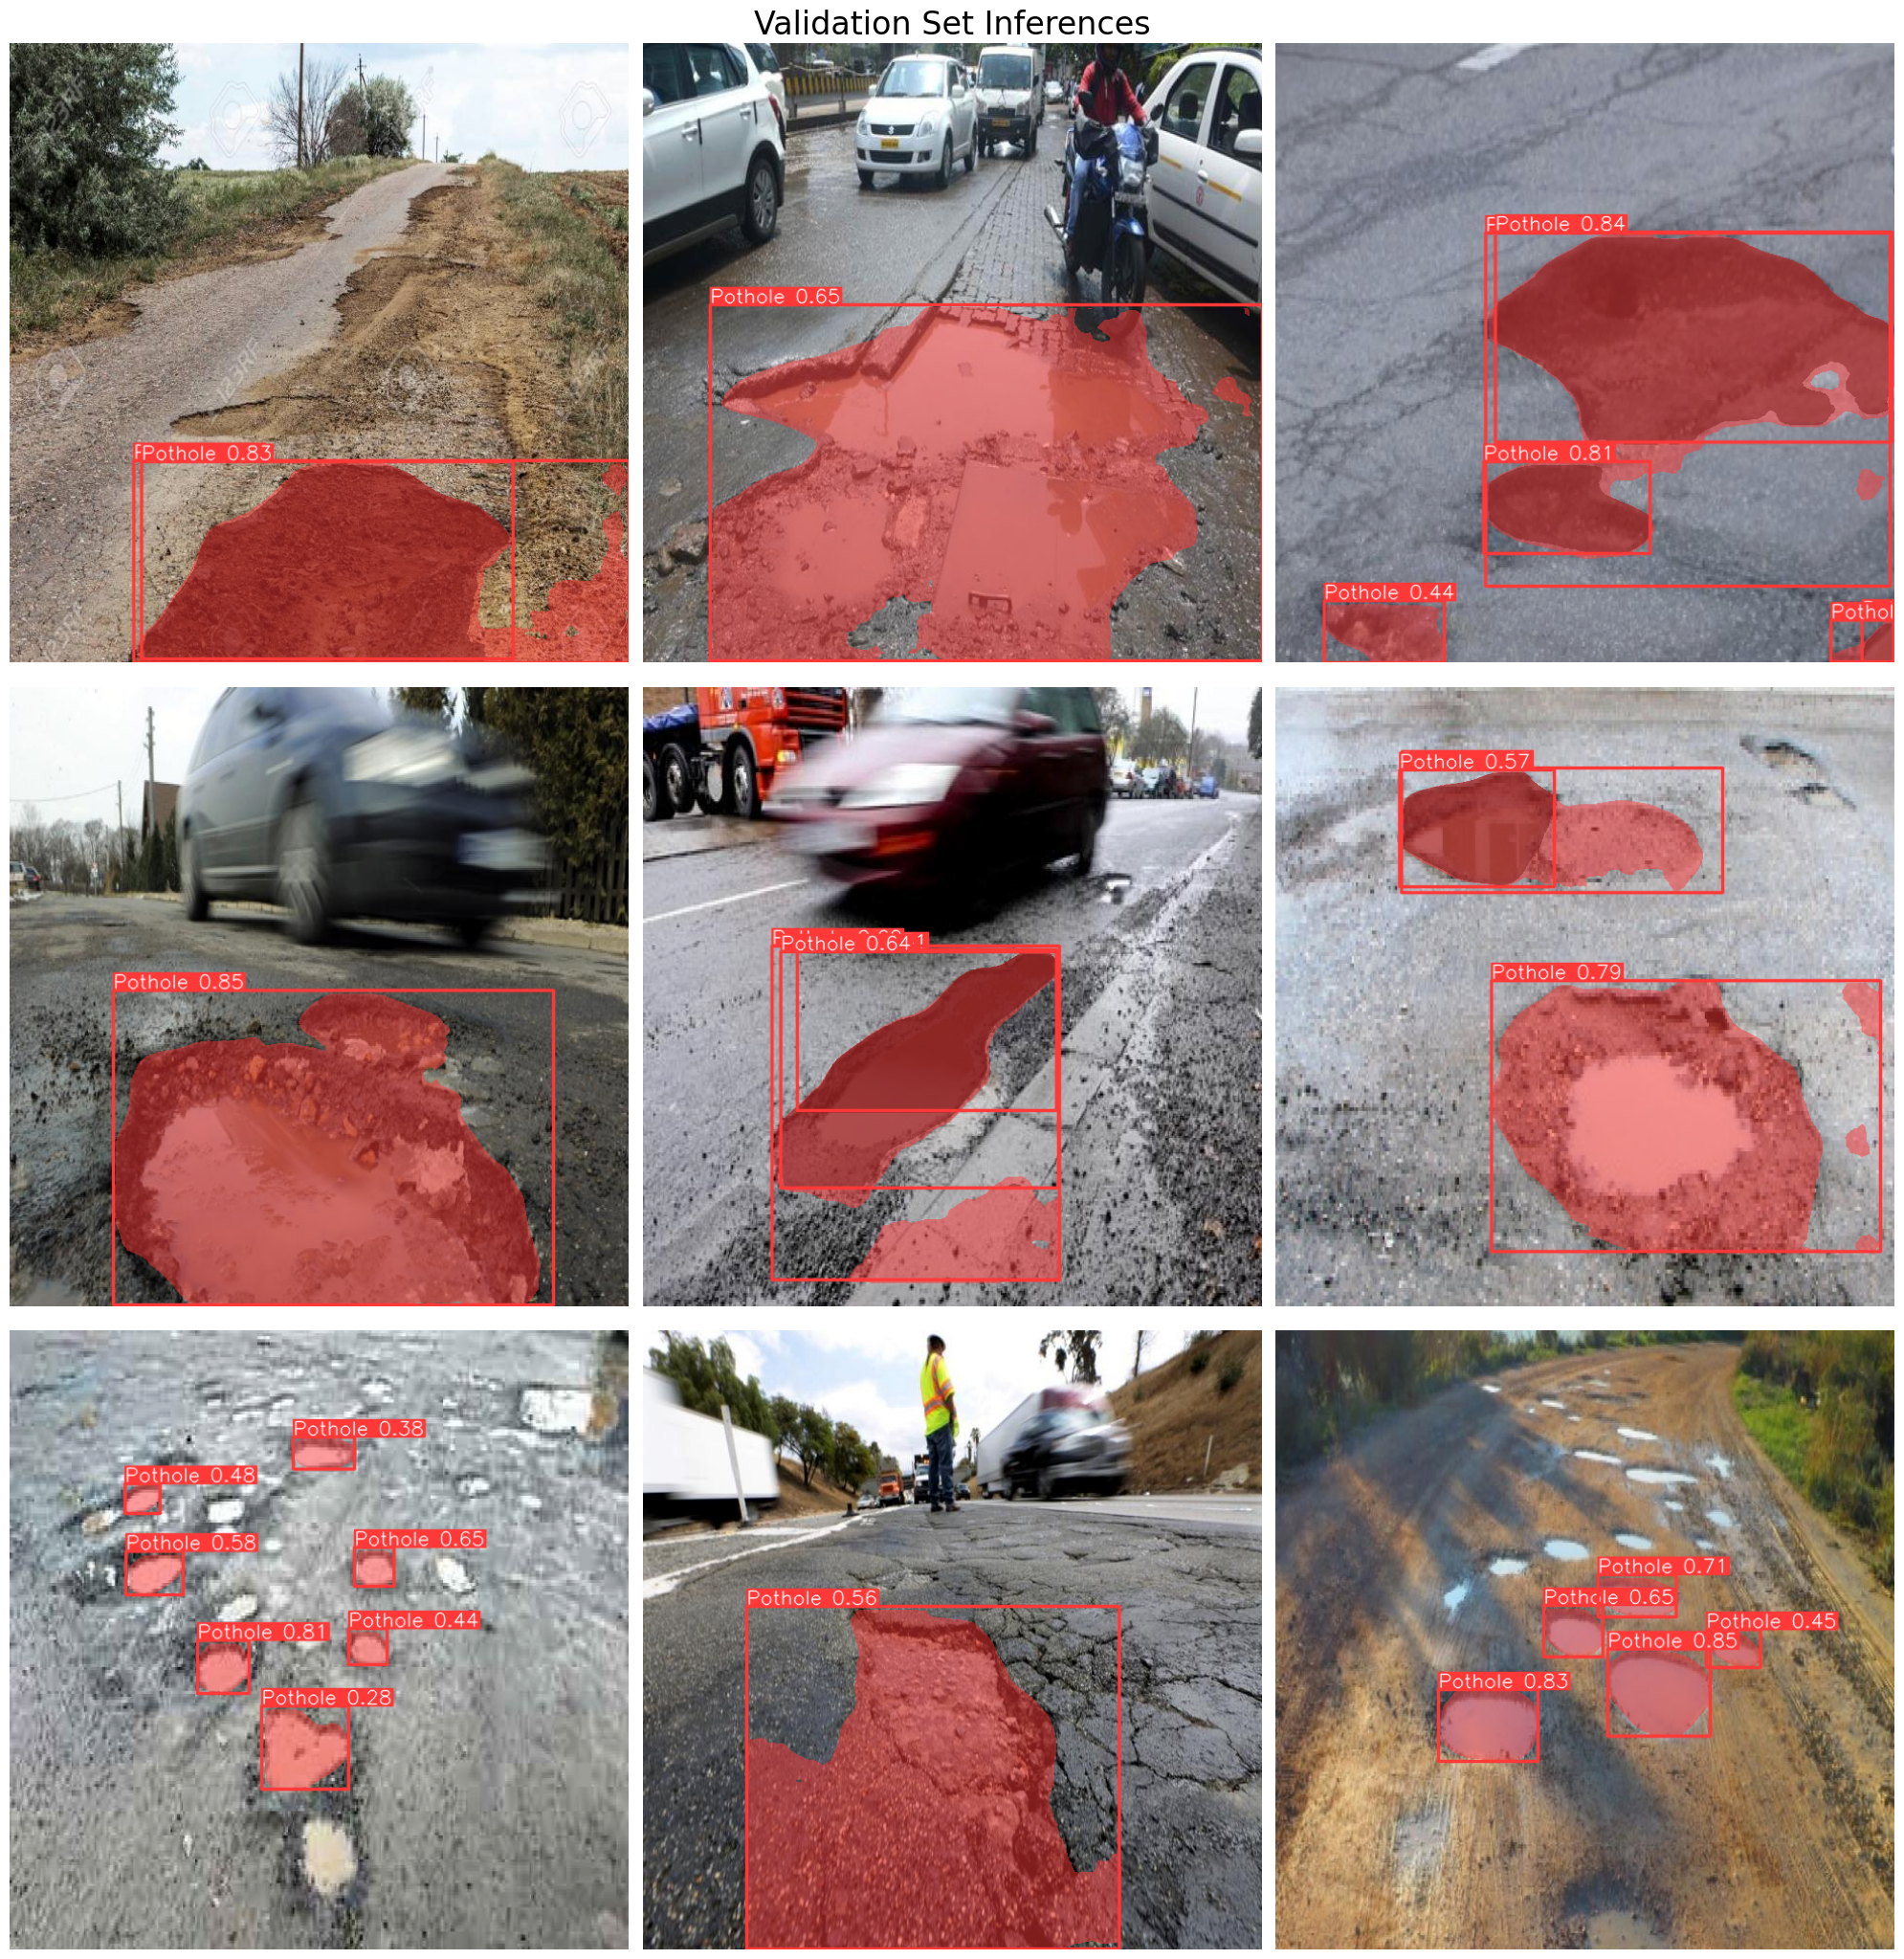

In [22]:
valid_images_path = os.path.join(dataset_path, 'valid', 'images')

# List all jpg images in the directory
image_files = [file for file in os.listdir(valid_images_path) if file.endswith('.jpg')]

# Select 9 images at equal intervals
num_images = len(image_files)
selected_images = [image_files[i] for i in range(0, num_images, num_images // 9)]

# Initialize the subplot
fig, axes = plt.subplots(3, 3, figsize=(20, 21))
fig.suptitle('Validation Set Inferences', fontsize=24)

# Perform inference on each selected image and display it
for i, ax in enumerate(axes.flatten()):
    image_path = os.path.join(valid_images_path, selected_images[i])
    results = best_model.predict(source=image_path, imgsz=640)
    annotated_image = results[0].plot()
    annotated_image_rgb = cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB)
    ax.imshow(annotated_image_rgb)
    ax.axis('off')

plt.tight_layout()
plt.show()


image 1/1 /kaggle/input/real-data/images.jpeg: 480x640 3 Potholes, 13.1ms
Speed: 2.1ms preprocess, 13.1ms inference, 3.2ms postprocess per image at shape (1, 3, 480, 640)


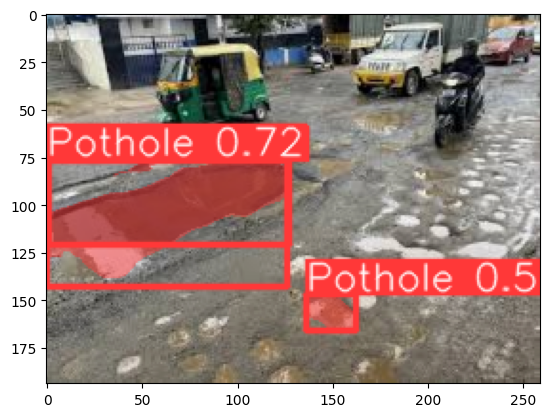

In [34]:
img_path = '/kaggle/input/real-data/images.jpeg'
img_pred = best_model.predict(source=img_path, imgsz=640)
annotated_image = img_pred[0].plot()
annotated_image_rgb = cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB)
plt.imshow(annotated_image_rgb)